## 手書き文字認識 

* CNNで学習、予測 
* モデルを保存 
* 実際の手書き文字を予測 




In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras import models, layers, callbacks
from keras.utils import np_utils


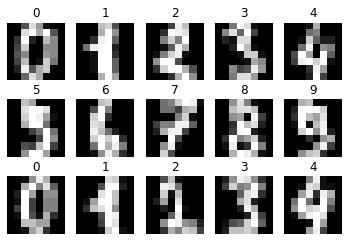

In [16]:
#データの読み込み
digits=datasets.load_digits()

#データの確認
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")
    
plt.show()

In [17]:
#0は黒、16は白
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [18]:
#正規化する0-1
# X=digits.images/16
X=digits.images

In [19]:
#モデルで学習させる

#データの用意
#目的変数は質的変数なのでone-hotエンコーディングの必要がある
X_data=X.reshape((-1,64))
y_data=np_utils.to_categorical(digits.target)

#学習用とテスト用に分割
X_train, X_test, y_train, y_test=train_test_split(X_data, y_data, test_size=0.2, random_state=20221010)

## NNで学習・予測

In [6]:
#アーキテクチャの構築
#入力層64, 中間層16, 出力層10
clf=models.Sequential()
clf.add(layers.Dense(64, input_shape=(64,)))
clf.add(layers.Activation('relu'))
clf.add(layers.Dense(32, input_shape=(16,)))
clf.add(layers.Activation('relu'))
clf.add(layers.Dropout(0.25))
clf.add(layers.Dense(10))
clf.add(layers.Activation('softmax'))

#コンパイル
clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#early_stopping
cb_es=callbacks.EarlyStopping(
    monitor='loss',
    patience=10,
    restore_best_weights=True
)

clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4160      
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 


2022-10-11 12:00:09.104997: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 6,570
Trainable params: 6,570
Non-trainable params: 0
_________________________________________________________________


In [7]:
#学習
history=clf.fit(X_train, y_train, epochs=100, verbose=1,callbacks=cb_es)

Epoch 1/100
45/45 [==============================] - 1s 3ms/step - loss: 4.5867 - accuracy: 0.1879
Epoch 2/100
45/45 [==============================] - 0s 3ms/step - loss: 1.6477 - accuracy: 0.4231
Epoch 3/100
45/45 [==============================] - 0s 3ms/step - loss: 1.2185 - accuracy: 0.5678
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 0.9285 - accuracy: 0.6729
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 0.7584 - accuracy: 0.7300
Epoch 6/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6333 - accuracy: 0.7898
Epoch 7/100
45/45 [==============================] - 0s 3ms/step - loss: 0.5407 - accuracy: 0.7989
Epoch 8/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4878 - accuracy: 0.8239
Epoch 9/100
45/45 [==============================] - 0s 3ms/step - loss: 0.4410 - accuracy: 0.8365
Epoch 10/100
45/45 [==============================] - 0s 3ms/step - loss: 0.3635 - accuracy: 0.8685
Epoch 11/

45/45 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9889
Epoch 84/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9903
Epoch 85/100
45/45 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9910
Epoch 86/100
45/45 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9903


In [8]:
loss, accuracy=clf.evaluate(X_test, y_test, verbose=0)
print('損失：',loss)
print('正解率：', accuracy)

損失： 0.08241300284862518
正解率： 0.9777777791023254


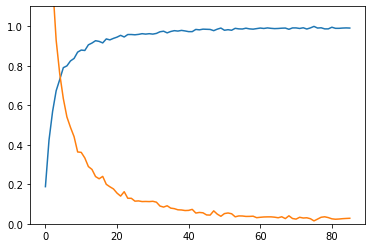

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylim(0.0, 1.1)

plt.show()

In [10]:
#学習済みモデルの保存
import pickle
with open("digits.pkl", "wb") as fp:
    pickle.dump(clf, fp)

INFO:tensorflow:Assets written to: ram://0413cfb3-efaa-4eec-89bb-1409e6eb62e8/assets


In [11]:
#学習済みモデルの読み込み
with open("digits.pkl", "rb") as fp:
    clf1=pickle.load(fp)

loss, accuracy=clf1.evaluate(X_test, y_test, verbose=0)
print('損失：',loss)
print('正解率：', accuracy)

損失： 0.08241300284862518
正解率： 0.9777777791023254


In [13]:
clf1.predict(X_test).shape

12/12 [==============================] - 0s 5ms/step


(360, 10)

## SVMで予測・学習

In [20]:
from sklearn import svm 

In [21]:
#データの用意
#目的変数は質的変数なのでone-hotエンコーディングの必要がある
X_data2=X.reshape((-1,64))
y_data2=digits.target

#学習用とテスト用に分割
X_train2, X_test2, y_train2, y_test2=train_test_split(X_data2, y_data2, test_size=0.2, random_state=20221010)

In [22]:
clf2=svm.SVC()
clf2.fit(X_train2, y_train2)

SVC()

In [23]:
y_pred2=clf2.predict(X_test2)
print(accuracy_score(y_test2, y_pred2))

0.9916666666666667


In [24]:
#学習済みモデルの保存
import pickle

with open("digits_svm.pkl", "wb") as fp2:
    pickle.dump(clf2, fp2)

In [25]:
#保存した学習済みモデルを読み込み
with open("digits_svm.pkl", "rb") as fp2:
    clf_svm=pickle.load(fp2)

accuracy_score(y_test2, clf_svm.predict(X_test2))

0.9916666666666667

In [26]:
clf_svm.predict(X_test2)

array([4, 1, 8, 7, 7, 0, 8, 1, 8, 9, 7, 1, 3, 0, 7, 1, 0, 5, 8, 2, 3, 7,
       0, 5, 9, 4, 1, 1, 1, 2, 3, 1, 1, 3, 2, 3, 9, 1, 3, 5, 3, 8, 6, 1,
       4, 8, 0, 1, 3, 4, 8, 8, 5, 8, 6, 8, 9, 9, 1, 2, 5, 2, 7, 9, 7, 4,
       2, 6, 4, 3, 5, 9, 3, 6, 5, 1, 2, 7, 5, 4, 2, 2, 8, 9, 5, 6, 1, 5,
       6, 7, 8, 9, 2, 9, 8, 3, 3, 8, 5, 1, 8, 6, 0, 2, 6, 7, 9, 6, 7, 7,
       4, 1, 5, 1, 0, 4, 7, 3, 7, 3, 1, 3, 7, 8, 5, 8, 4, 7, 3, 5, 8, 0,
       8, 7, 7, 4, 5, 3, 8, 2, 3, 1, 3, 4, 8, 8, 0, 2, 3, 0, 4, 3, 6, 5,
       0, 3, 1, 7, 0, 4, 1, 8, 8, 6, 9, 0, 9, 2, 7, 1, 1, 5, 0, 8, 9, 4,
       9, 1, 1, 3, 8, 7, 9, 1, 2, 3, 4, 2, 9, 9, 9, 3, 2, 1, 1, 1, 3, 4,
       2, 7, 2, 3, 7, 6, 0, 1, 4, 5, 8, 0, 9, 3, 4, 2, 8, 8, 7, 4, 3, 3,
       9, 2, 3, 9, 1, 2, 1, 3, 1, 7, 3, 2, 4, 9, 7, 4, 4, 9, 7, 5, 5, 6,
       0, 7, 4, 6, 8, 2, 2, 5, 9, 9, 0, 4, 9, 1, 7, 4, 7, 6, 4, 8, 9, 7,
       1, 6, 1, 1, 2, 2, 5, 8, 1, 3, 8, 9, 4, 5, 0, 4, 5, 9, 0, 1, 3, 2,
       1, 3, 8, 8, 4, 8, 5, 2, 3, 9, 3, 3, 9, 9, 2,

In [29]:
X_test2

array([[ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  8.,  0.,  0.],
       [ 0.,  0.,  9., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  7., 12., ...,  0.,  0.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 11.,  1.,  0.]])